# Divisibilidade

## Divisão Euclidiana
 
Há algo errado: o resultado coincide com o do sage, com o resto negativo se $b<0$. Verificar!

In [1]:
def div_euc(a,b): 
  k = 0 
  if a == 0: 
    return (0,0) 
  if a > 0 and b > 0: 
    while a-k*b >= 0: 
      k += 1 
    return (k-1, a-(k-1)*b) 
  elif a < 0 and b > 0: 
    while a-k*b < 0: 
      k -= 1 
    return (k, a-k*b) 
  elif a < 0 and b < 0: 
    while a-k*b <= 0: 
      k += 1 
    return (k-1, a-(k-1)*b) 
  else: 
  #a > 0 e b < 0 
    while a-k*b > 0:
      k -= 1
    return (k, a-k*b) 
div_euc(10,-3)


(-4, -2)

# MDC e Bézout-Bachet

In [2]:
a = 342
b = 101
(q,r) = (b,a.quo_rem(b)[1])
while r != 0:
  (q,r) = (r,q.quo_rem(r)[1])
  
print("mdc({},{})=".format(a,b), q)



mdc(342,101)= 1


### Algoritmo de Euclides estendido

**Não está funcionando quando $b\mid a$**. Tem que testar
se o primeiro `r0` é igual a $0$


In [3]:
a = 101
b = 342
(q0,r0) = a.quo_rem(b)
(q1,r1) = b.quo_rem(r0)
(x0,y0,x1,y1) = (1,-q0,-q1,1+q0*q1)

while r1 > 0:
    raux = r0
    (q0,r0,q1,r1) = (q1,r1,r0.quo_rem(r1)[0],r0.quo_rem(r1)[1])
#     (q1,r1) = raux.quo_rem(r1) 
    print(raux,'=',q1,'*',r0,'+',r1)
    (x0,y0,x1,y1) = (x1,y1,x0-q1*x1,y0-q1*y1)    
    
print(x0,y0,r0)
print(x0*a+y0*b)


101 = 2 * 39 + 23
39 = 1 * 23 + 16
23 = 1 * 16 + 7
16 = 2 * 7 + 2
7 = 3 * 2 + 1
2 = 2 * 1 + 0
149 -44 1
1


### XGCD com matrizes


In [ ]:
a = 1001
b = 109
M = Matrix([[1,0],[0,1],[a,b]])
while M[2,1] != 0:
    q = floor(M[2,0]/M[2,1])
    M = M*matrix([[0,1],[1,-q]])
    print(M)
    input()
print(M[2,0],M[0,0],M[1,0])
print(xgcd(a,b))
print(M[2,0]==M[0,0]*a+b*M[1,0])

[  0   1]
[  1  -9]
[109  20]


## Frações contínuas

A célula a seguir calcula a $n$-ésima convergente $p_n/q_n$ de uma fração contínua
usando a recorrência
$$
  \begin{cases}
    p_n = a_np_{n-1} + p_{n-2} \\
    q_n = a_nq_{n-1} + q_{n-2} \\
  \end{cases}
$$

In [ ]:
def f(a,n):
    if n == 0:
        return (a[0],1)
    if n == 1:
        return (a[0]*a[1]+1,a[1])
    pn = a[n]*f(a,n-1)[0] + f(a,n-2)[0]
    qn = a[n]*f(a,n-1)[1] + f(a,n-2)[1]
    return (pn,qn)

a = continued_fraction(pi^2)
print(a)
print(f(a,n)[0]/f(a,n)[1])
n = 10
print(a.convergent(n) == f(a,n)[0]/f(a,n)[1])

# Conjectura de Collatz

In [ ]:
def f(n): 
  if n % 2 == 0: 
    return n/2 
  else: 
    return 3*n+1 

def collatz(k): 
  i = 0 
  if k == 1: 
      return 1 
  k = floor(k) 
  while f(k) != 1: 
      k = f(k) 
      i = i+1 
      #print("f^i(k) = ", k, "\t i = ", i) 
  return i 
list_plot([(k,collatz(k)) for k in srange(1,1000)])



# Fatoração
Algoritmo para fatoração de um dado $n$, com e sem recursividade.
Note que o algoritmo não é eficiente.

In [ ]:
def fat(n, fatores = []):
    if n == 1:
        return fatores
    p = 2
    while  not p.divides(n):
        p = p.next_prime()
    
    return fat(n/p,fatores+[p])

# print(fat(1729))

# fat99 = fat(99)
# print(fat99)
# print(prod(fat(99)) == 99)

def fat_sem_recursao(n):
    fatores = []
    p = 2
    i = 0
    while n != 1:
        while (not p.divides(n)):
            i+=1
            print(p,n)
            p = p.next_prime()
        fatores.append(p)
        n = n/p
        if p^2 > n:
            p = n
    print("Iter.:", i)
    return fatores

n = 7*11*13*19*29*31^3*41
ff = fat_sem_recursao(n)
print(ff)
print('fat ok', prod(ff)== n)

## Fibonacci e Cálculo simbólico (Explore!)

In [ ]:
# def fib(n):
#   if n == 0 or n == 1:
#     return 1
#   return fib(n-1) + fib(n-2)
# [fib(n) for n in [0..10]]

def fib_g(n):
    phi = (1+sqrt(5))/2
    psi = (1-sqrt(5))/2
    return (phi^n - psi^n)/(phi-psi)  
print(fib_g(6))
show(fib_g(6))
print(expand(fib_g(6)))


### Plotando o gráfico de curvas implicitas

In [1]:
var('y')
c1 = implicit_plot(y^2 == x^3 + x,(-1,1),(-1,1),color='green') 
c2 = implicit_plot(y == 3*x,(-1,1),(-1,1),color='red')
p = point((0,0),size=40,color='black')
# show(c1+c2+p)

### Resolvendo uma recorrência linear

Encontramos a fórmula geral da recorrência $x_n = 4x_{n-1} + 3x_{n-2} - 14x_{n-3} -6x_{n-4}$ com termos
iniciais $x_0 = x_1 = 4, x_2 = 22$ e $x_3 = 58$.

In [2]:
a = (1+sqrt(2))                                                                                    
b = (1-sqrt(2))                                                                                    
c = (1+sqrt(7))                                                                                    
d = (1-sqrt(7))                                                                                    

f = (x-a)*(x-b)*(x-c)*(x-d)                                                                        

expand(f)                                                                                  
x_inicial = [4,a+b+c+d,a^2+b^2+c^2+d^2,a^3+b^3+c^3+d^3]

# por recorrência
def v(n):
    global x_inicial
    if n<=3:
        return x_inicial[n]
    else:
        return 4*v(n-1)+3*v(n-2)-14*v(n-3)-6*v(n-4)
[expand(v(n)) for n in [0..10]]

# pela fórmula geral
def vg(n):
    global a,b,c,d,x_inicial
    return a^n + b^n + c^n + d^n
print([(expand(v(n)),expand(vg(n))) for n in [0..15]])

var('n')
show(a^n+b^n+c^n+d^n)



[(4, 4), (4, 4), (22, 22), (58, 58), (218, 218), (714, 714), (2566, 2566), (9006, 9006), (32418, 32418), (116482, 116482), (421702, 421702), (1528366, 1528366), (5553314, 5553314), (20195634, 20195634), (73515142, 73515142), (267730878, 267730878)]


(sqrt(7) + 1)^n + (-sqrt(7) + 1)^n + (sqrt(2) + 1)^n + (-sqrt(2) + 1)^n

In [3]:
a = (1+sqrt(2))                                                                                    
b = (1-sqrt(2))                                                                                    
c = (1+sqrt(7))                                                                                    
d = (1-sqrt(7))                                                                                    
f = (x-a)*(x-b)*(x-c)*(x-d)

"""
CASO GERAL:
construir o polinômio através dos coeficientes
de recorrência da sequência e chamar de a,b,c
e d suas raízes
"""

x_inicial = [1,-1,1,-1]
var('a1,a2,a3,a4')
eqs = [
    a1+a2+a3+a4 == x_inicial[0],
    a1*a + a2*b+a3*c+a4*d ==  x_inicial[1],
    a1*a^2 + a2*b^2+a3*c^2+a4*d^2 ==  x_inicial[2],
    a1*a^3 + a2*b^3+a3*c^3+a4*d^3 ==  x_inicial[3],
]
show(eqs)
s = solve(eqs,a1,a2,a3,a4)
coef = [s[0][i].rhs() for i in [0..3]]

# por recorrência
def v(n):
    global x_inicial
    if n<=3:
        return x_inicial[n]
    else:
        return 4*v(n-1)+3*v(n-2)-14*v(n-3)-6*v(n-4)

# pela fórmula geral
def vg(n):
    global a,b,c,d,coef
    return coef[0]*a^n + coef[1]*b^n + coef[2]*c^n + coef[3]*d^n


print([(expand(v(n)),expand(vg(n))) for n in [0..15]])

[a1 + a2 + a3 + a4 == 1,
 a3*(sqrt(7) + 1) - a4*(sqrt(7) - 1) + a1*(sqrt(2) + 1) - a2*(sqrt(2) - 1) == -1,
 a3*(sqrt(7) + 1)^2 + a4*(sqrt(7) - 1)^2 + a1*(sqrt(2) + 1)^2 + a2*(sqrt(2) - 1)^2 == 1,
 a3*(sqrt(7) + 1)^3 - a4*(sqrt(7) - 1)^3 + a1*(sqrt(2) + 1)^3 - a2*(sqrt(2) - 1)^3 == -1]

[(1, 1), (-1, -1), (1, 1), (-1, -1), (7, 7), (17, 17), (97, 97), (347, 347), (1399, 1399), (5177, 5177), (19465, 19465), (71723, 71723), (264415, 264415), (969257, 969257), (3549361, 3549361), (12973067, 12973067)]


# Primos

In [4]:
#l = [[10^i,prime_pi(10^i),RR(10^i/log(10^i)),prime_pi(10^i)/RR(10^i/log(10^i))] for i in range(1,14)]
for i in range(8):
    print('10^{}  & {:d} & {:.2f} & {:.5f} \\\\'.format(i+1,l[i][1],float(l[i][2]),float(l[i][3])))

NameError: name 'l' is not defined

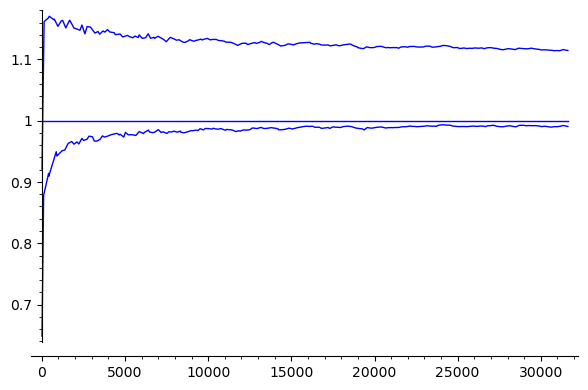

In [5]:
def tnp(x):
    return RR(x/log(x))
def erro(x):
    return prime_pi(x)/tnp(x)
def erroli(x):
    return prime_pi(x)/li(x)
# plot(tnp,10,2000)+plot(prime_pi,10,2000)
K = 10^4.5
plot(erro,10,K) + plot(lambda x:1, 10, K)+plot(erroli,10,K)

In [6]:
# # n = 100
# @interact(x = (50,20000,100))
# def _(x=50):
#     def bertrand(n):
#         return prime_pi(2*n) - prime_pi(n)
#     P = plot(bertrand,1,x)
#     show(P)
# # IntSlider(min=-10,max=30,step=1,value=10)
@interact(x=(10,100))
def pp(x):
    P = plot(prime_pi,1,x)
    show(P)

## Algoritmo AKS

Implementamos aqui o algoritmo AKS que verifica primalidade em tempo
polinomial. Definimos primeiramente a função `is_perfect_power` que
verifica se o inteiro em questão é uma potência perfeita. Usamos
o fato que, se $n = a^b$, como $a\geq 2$, $b \leq \log_2(n)$, 
caso contrário $a^b> 2^{\log_2(n)}=n$. Assim, definindo
$m=\lfloor\log_2(n)\rfloor$, basta verificar se
$\left(\sqrt[k]{n}\right)^k = n$ para algum $k=2,\dots,m$.


`Exception (FLINT memory_manager). Unable to allocate memory.`
na linha 48 (funciona para números pequenos). verificar forma
mais eficiente de efetuar esse cálculo.


In [9]:
def is_perfect_power(n):
#     m = 0
#     while N(n/2^m) > 1:
#         m+=1
#     print(m,floor(log(n,base=2)))
    m = floor(log(n,base=2))
#     print(m)
    for i in [2..(m)]:
        if floor(N(n^(1/i)))^i == n:
#             print("n = ", (n^(1/i)), "^", i)
            return True
    return False

def o(a,r):
    if gcd(a,r) != 1:
        return "Erro: r e n nao coprimos"
    Zr = Zmod(r)
    return a.multiplicative_order()

is_perfect_power(2^123*3^124)

def aks(n):
    if is_perfect_power(n):
        print("teste 1")
        return True
    r = 2
    if r.divides(n):
        print("teste 1.1 (par)")
        return False
    while o(r,n) < (log(n,base=2))^2: #só quero que essa linha seja executada se gcd(r.n) = 1
        while gcd(r,n) > 1:
            r += 1
    
    for a in [2..r]:
        if gcd(a,n)<n and gcd(a,n)>1:
            print("teste 2")
#             print(a,n)
#             print(gcd(a,n))
            return False
    if n <= r:
        print("teste 3")
        return True
    Zn = Zmod(n)
    Pn.<t> = Zn[]
    P = QuotientRing(Pn,Pn.ideal(t^r - 1))
    for a in [1..(floor(sqrt(euler_phi(r))*log(n,base=2)))]:
#         print(n,r,a)
        if P((t+a))^n != P(t^n+a):
            print("teste 4")
            return False
    print("teste final")
    return True

cand = [random_prime(10^5,lbound=10^4)+2 for i in [1..50]]

print(all([aks(n)==is_prime(n) for n in cand]))
    

teste 4
teste 4
teste final
teste 4
teste 4
teste 4
teste 4
teste final
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste final
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste 4
teste final
teste 4
teste 4
teste 4
teste 4
teste final
teste 4
teste 4
teste 4
teste 4
teste 4
True


### Funções Aritméticas

In [10]:
def psi_pp(n):
    fatoracao = factor(n)
    if len(fatoracao) != 1:
        return "Erro: {} não é potência de primo".format(n)
    p = fatoracao[0][0]
    e = fatoracao[0][1]
    return p^e + p^(e-1)
    
print("psi(16) = ", psi_pp(16))
print("psi(22) = ", psi_pp(22))

psi(16) =  24
psi(22) =  Erro: 22 não é potência de primo


In [ ]:
def psi(n):
    if n <= 0:
        return "Erro: n deve ser positivo"
    if n == 1:
        return 1
    fatoracao = factor(n)
    total = prod([psi_pp(p^e) for (p,e) in fatoracao])
    return total

# A = list_plot([(i,psi(i)) for i in [1..100]])
plot(lambda x:euler_phi(floor(x))/x,1,100,color='red')


### Sequência de alíquota

In [11]:
n = 25312

K = 1000
k = 0
aliquot = [n]

while k < K:
    sk = aliquot[-1]
    if sk == 0:
        break
    if sigma(sk)-sk in aliquot:
        break
    aliquot.append(sigma(sk)-sk)

    k += 1
show(aliquot)
show(len(aliquot))


[25312,
 32144,
 42070,
 44618,
 31894,
 17354,
 8680,
 14360,
 18040,
 27320,
 34240,
 48056,
 42064,
 47216,
 51736,
 49064,
 42946,
 22394,
 11200,
 20296,
 19304,
 19096,
 26984,
 23626,
 11816,
 13624,
 14096,
 13246,
 7274,
 3640,
 6440,
 10840,
 13640,
 20920,
 26240,
 38020,
 41864,
 36646,
 19298,
 9652,
 8268,
 12900,
 25292,
 18976,
 18446,
 10498,
 5882,
 3514,
 2534,
 1834,
 1334,
 826,
 614,
 310,
 266,
 214,
 110,
 106,
 56,
 64,
 63,
 41,
 1,
 0]

64

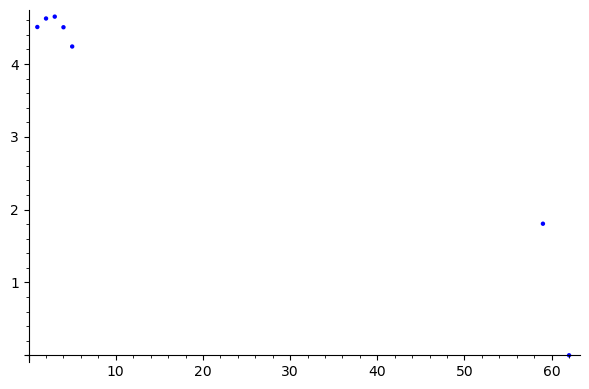

In [12]:
list_plot([(i,log(aliquot[i],10)) for i in [1..5]+[len(aliquot)-5,len(aliquot)-2]])

# Congruências

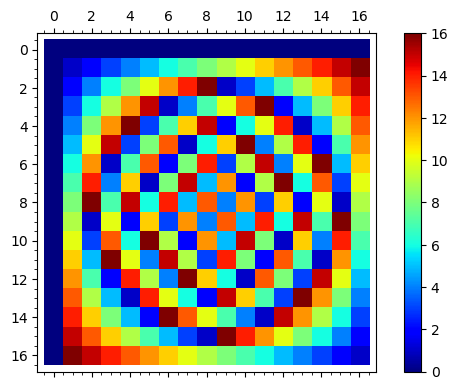

In [13]:
Z10 = Zmod(14.next_prime())
a = Z10(3)
a.multiplicative_order()
matrix_plot([[i*j for i in Z10] for j in Z10],cmap='jet',colorbar=True)

In [14]:
print(Z10.addition_table(names='digits'))
print(Z10.multiplication_table(names='digits'))


 +  00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16
  +---------------------------------------------------
00| 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16
01| 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 00
02| 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 00 01
03| 03 04 05 06 07 08 09 10 11 12 13 14 15 16 00 01 02
04| 04 05 06 07 08 09 10 11 12 13 14 15 16 00 01 02 03
05| 05 06 07 08 09 10 11 12 13 14 15 16 00 01 02 03 04
06| 06 07 08 09 10 11 12 13 14 15 16 00 01 02 03 04 05
07| 07 08 09 10 11 12 13 14 15 16 00 01 02 03 04 05 06
08| 08 09 10 11 12 13 14 15 16 00 01 02 03 04 05 06 07
09| 09 10 11 12 13 14 15 16 00 01 02 03 04 05 06 07 08
10| 10 11 12 13 14 15 16 00 01 02 03 04 05 06 07 08 09
11| 11 12 13 14 15 16 00 01 02 03 04 05 06 07 08 09 10
12| 12 13 14 15 16 00 01 02 03 04 05 06 07 08 09 10 11
13| 13 14 15 16 00 01 02 03 04 05 06 07 08 09 10 11 12
14| 14 15 16 00 01 02 03 04 05 06 07 08 09 10 11 12 13
15| 15 16 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14
16| 16 00 

# Equações diofantinas

### A equação $aX + bY = c$

In [15]:
def dioflin(a,b,c):
    if a == 0 and b == 0:
        return "a e b ambos nulos"
    (d,xt,yt) = xgcd(a,b)
    if not d.divides(c):
        return "mdc(a,b) não divide c. A eq. não possui solução"
    sol = (c/d*xt,c/d*yt)
    return sol
    

(a,b,c) = (6841684,5168416,8484)
(x,y) = dioflin(a,b,c)
print(x,y)
print(x*a+y*b, c)


408209781 -540367170
8484 8484


***
# Lixo

In [ ]:
# x = var('x')
# eqn =  x^3 + sqrt(2)*x + 5 == 0
# a = solve(eqn, x)[0].rhs()
# pretty_print(a)
# show(continued_fraction(pi))
# A = matrix(3,3,{(0,0):1})
# show(A)
print(RR(e))
RR100 = RealField(prec=100)
print(RR100)
print(RR100(e))
p = next_prime(10)
matrix_plot([[mod(i^j,p) for i in range(p)] for j in range(p)],cmap='jet')

